# Results of ```hybirt```
find individual tests below

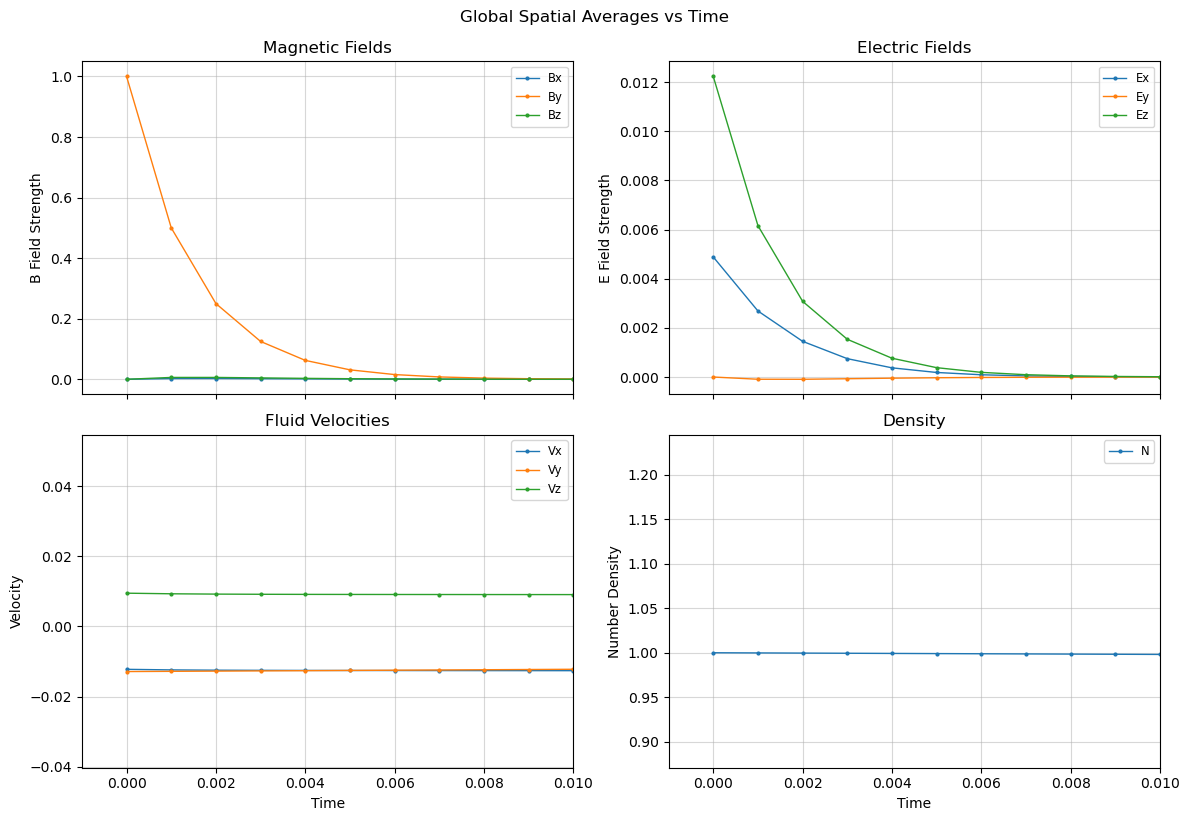

In [7]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

# Update this path to your specific directory
dir_path = '/Users/formanet/github/MCHPC/build/'

try:
    f = h5py.File(os.path.join(dir_path, 'fields.h5'), 'r')
except FileNotFoundError:
    print(f"File not found at {dir_path}. Please check the path.")
    exit()

times = []
fields_names = ["Bx", "By", "Bz", "Ex", "Ey", "Ez", "Vx", "Vy", "Vz", "N"]
# Use a dictionary for easier access by name
data = {name: [] for name in fields_names}

t_group = f["/t"]

# IMPORTANT FIX: Sort keys as floats, otherwise "10.0" comes before "2.0"
sorted_keys = sorted(t_group.keys(), key=lambda x: float(x))

for time_str in sorted_keys:
    times.append(float(time_str))
    
    # Load data for this timestep
    current_group = t_group[time_str]
    for name in fields_names:
        val = np.mean(current_group[name][()])
        val = current_group[name][()][10]
        data[name].append(val)

# Define logical groups for plotting
# Format: (Title, [List of Variable Names], Y-Label)
plot_groups = [
    ("Magnetic Fields", ["Bx", "By", "Bz"], "B Field Strength"),
    ("Electric Fields", ["Ex", "Ey", "Ez"], "E Field Strength"),
    ("Fluid Velocities", ["Vx", "Vy", "Vz"], "Velocity"),
    ("Density", ["N"], "Number Density")
]

# Create a 2x2 grid of plots sharing the X axis (Time)
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
axes = axes.flatten() # Flatten 2D array to 1D for easy iteration

for i, (title, vars_to_plot, ylabel) in enumerate(plot_groups):
    ax = axes[i]
    for var in vars_to_plot:
        ax.plot(times, data[var], '.-', label=var, linewidth=1, markersize=4)
    
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.5)
    ax.legend(loc='best', fontsize='small')

# Set common X label for bottom plots
for ax in axes[-2:]:
    ax.set_xlabel("Time")

# set xlim to (0,0.2)
for ax in axes:
    ax.set_xlim(-0.001,0.01)

plt.tight_layout()
plt.suptitle(f"Global Spatial Averages vs Time", y=1.02)
plt.show()
f.close()

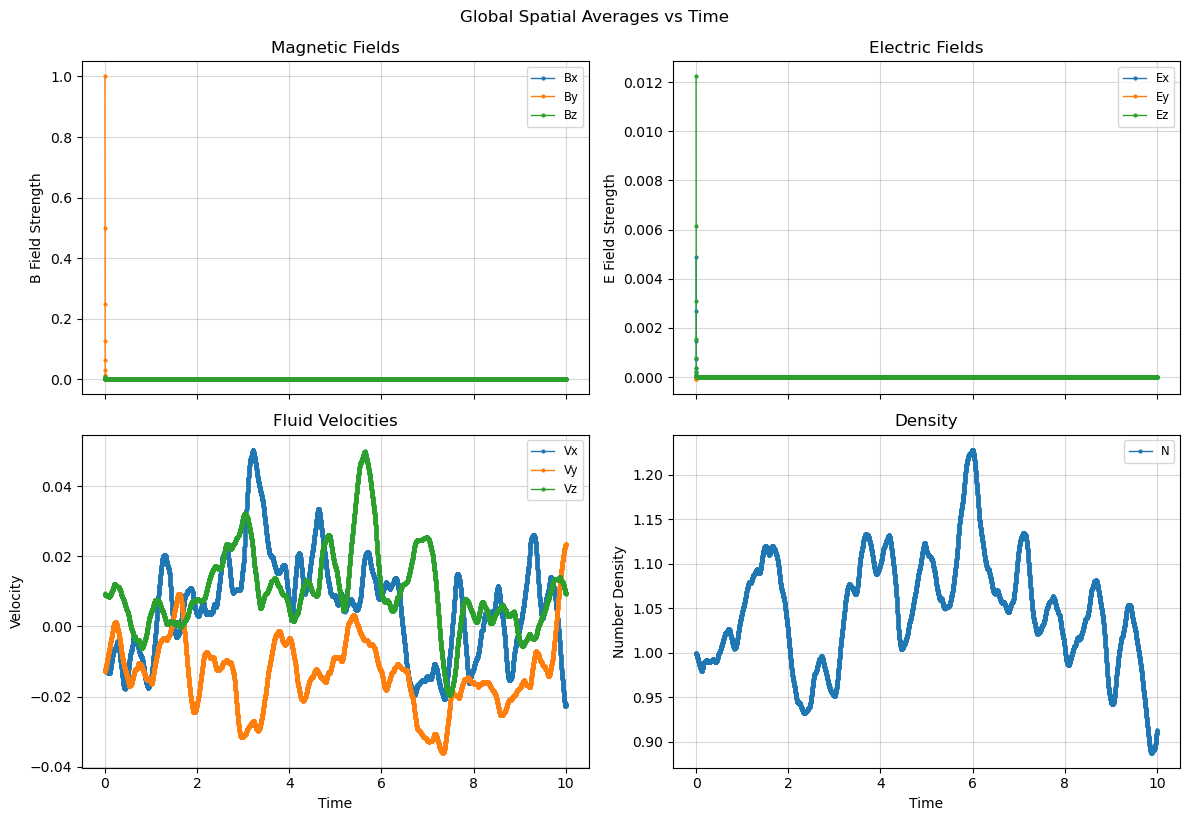

In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

# Update this path to your specific directory
dir_path = '/Users/formanet/github/MCHPC/build/'

try:
    f = h5py.File(os.path.join(dir_path, 'fields.h5'), 'r')
except FileNotFoundError:
    print(f"File not found at {dir_path}. Please check the path.")
    exit()

times = []
fields_names = ["Bx", "By", "Bz", "Ex", "Ey", "Ez", "Vx", "Vy", "Vz", "N"]
# Use a dictionary for easier access by name
data = {name: [] for name in fields_names}

t_group = f["/t"]

# IMPORTANT FIX: Sort keys as floats, otherwise "10.0" comes before "2.0"
sorted_keys = sorted(t_group.keys(), key=lambda x: float(x))

for time_str in sorted_keys:
    times.append(float(time_str))
    
    # Load data for this timestep
    current_group = t_group[time_str]
    for name in fields_names:
        val = np.mean(current_group[name][()])
        val = current_group[name][()][10]
        data[name].append(val)

# Define logical groups for plotting
# Format: (Title, [List of Variable Names], Y-Label)
plot_groups = [
    ("Magnetic Fields", ["Bx", "By", "Bz"], "B Field Strength"),
    ("Electric Fields", ["Ex", "Ey", "Ez"], "E Field Strength"),
    ("Fluid Velocities", ["Vx", "Vy", "Vz"], "Velocity"),
    ("Density", ["N"], "Number Density")
]

# Create a 2x2 grid of plots sharing the X axis (Time)
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
axes = axes.flatten() # Flatten 2D array to 1D for easy iteration

for i, (title, vars_to_plot, ylabel) in enumerate(plot_groups):
    ax = axes[i]
    for var in vars_to_plot:
        ax.plot(times, data[var], '.-', label=var, linewidth=1, markersize=4)
    
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.5)
    ax.legend(loc='best', fontsize='small')

# Set common X label for bottom plots
for ax in axes[-2:]:
    ax.set_xlabel("Time")

# set xlim to (0,0.2)
#for ax in axes:
#    ax.set_xlim(-0.001,0.01)

plt.tight_layout()
plt.suptitle(f"Global Spatial Averages vs Time", y=1.02)
plt.show()
f.close()

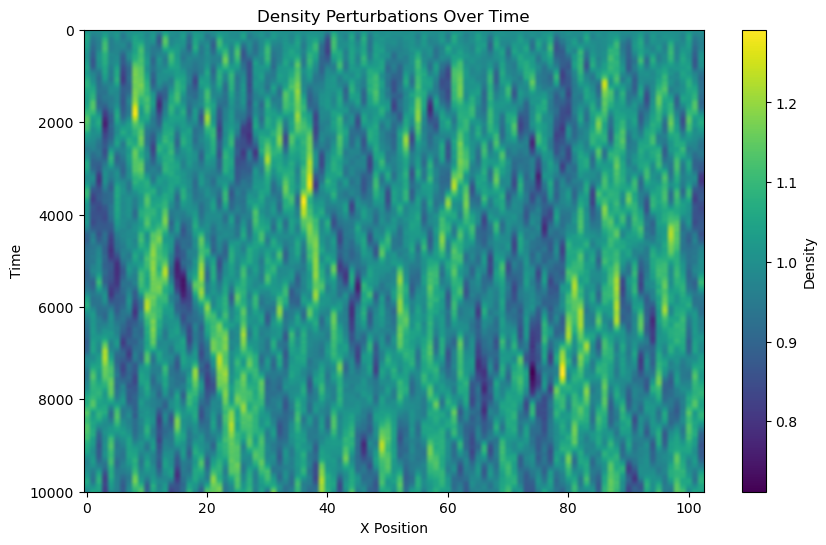

In [13]:
# visualise 2D image with density perturbations over time 
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
# Update this path to your specific directory
dir_path = '/Users/formanet/github/MCHPC/build/'
try:
    f = h5py.File(os.path.join(dir_path, 'fields.h5'), 'r')
except FileNotFoundError:
    print(f"File not found at {dir_path}. Please check the path.")
    exit()
times = []
density_slices = []
t_group = f["/t"]
# IMPORTANT FIX: Sort keys as floats, otherwise "10.0" comes before "2.0"
sorted_keys = sorted(t_group.keys(), key=lambda x: float(x))
for time_str in sorted_keys:
    times.append(float(time_str))
    current_group = t_group[time_str]
    density_data = current_group["N"][()]
    density_slices.append(density_data)
density_slices = np.array(density_slices)
# Create a 2D image plot
plt.figure(figsize=(10, 6))
plt.imshow(density_slices, aspect='auto', cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel('X Position')
plt.ylabel('Time')
plt.title('Density Perturbations Over Time')
plt.show()

# Testing the boris pusher

----------------------------------------------------------------------
File: /Users/formanet/github/MCHPC/build/tests/boris/uniform_bz.h5
Final position x: 5.050000, Ideal: 5.050000, Delta: 4.332886e-07
Final velocity vx: -0.002280, Ideal: 0.000000, Delta: -2.280233e-03
Final velocity vy: 1.999999, Ideal: 2.000000, Delta: -1.299866e-06
Final velocity vz: 0.000000, Ideal: 0.000000, Delta: 0.000000e+00
Test PASSED: Numerical solution is within the acceptable threshold.
----------------------------------------------------------------------
----------------------------------------------------------------------
File: /Users/formanet/github/MCHPC/build/tests/boris/drift_ey.h5
Final position x: 6.620806, Ideal: 6.620796, Delta: 9.969955e-06
Final velocity vx: 0.004500, Ideal: 0.000000, Delta: 4.500148e-03
Final velocity vy: 1.000552, Ideal: 1.000000, Delta: 5.522404e-04
Final velocity vz: 0.000000, Ideal: 0.000000, Delta: 0.000000e+00
Test PASSED: Numerical solution is within the acceptable t

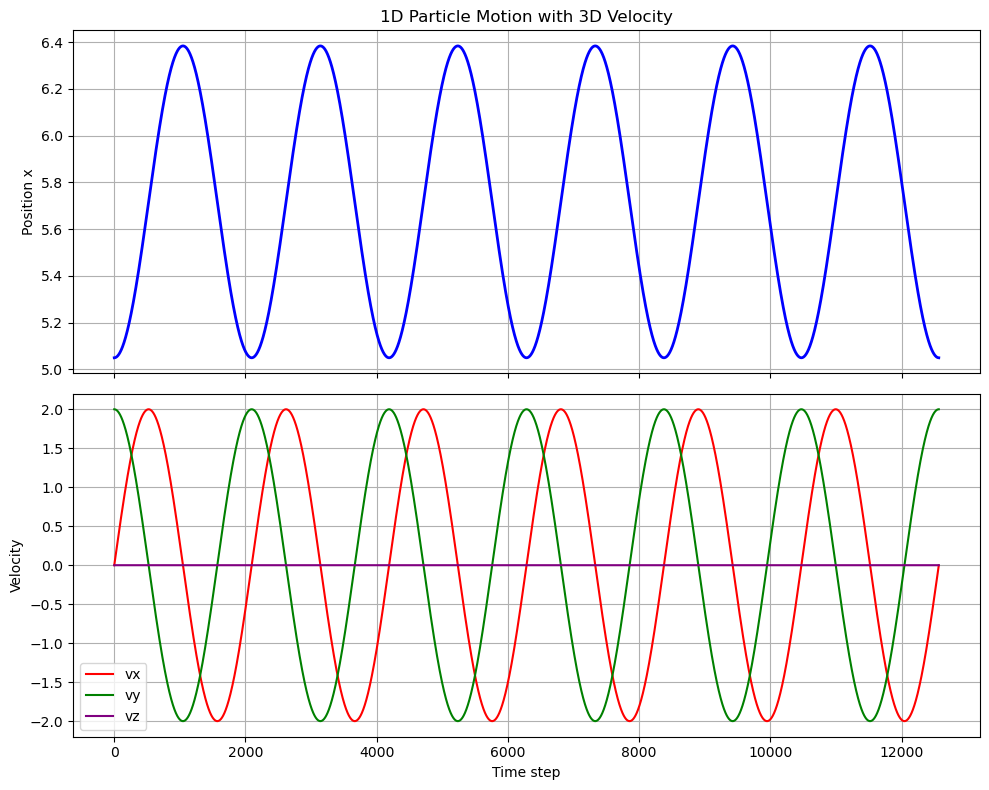

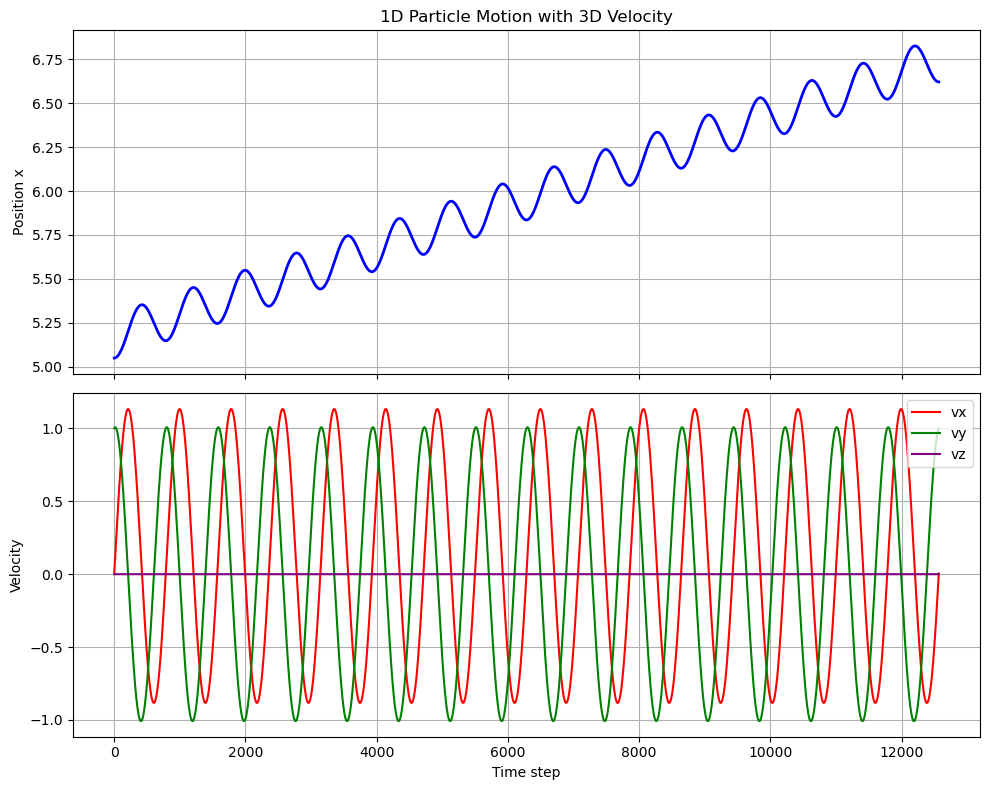

In [2]:
from tests.boris.evaluate_test import run_test as test_boris
test_boris()

# Testing Ampere and Faraday

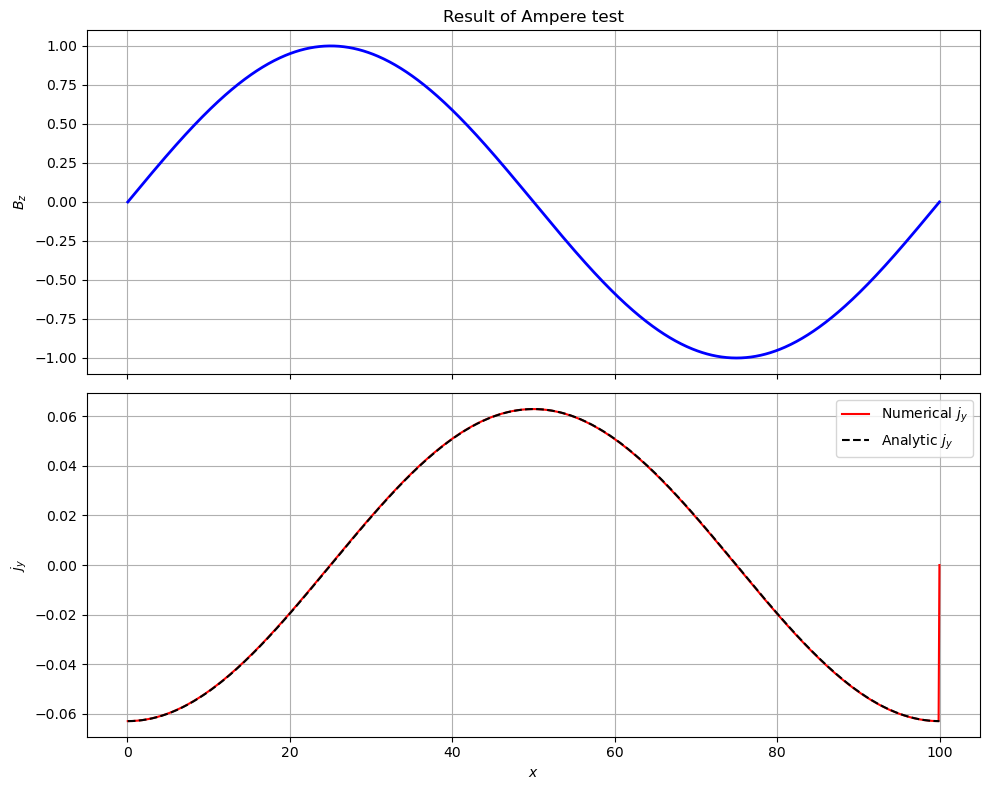

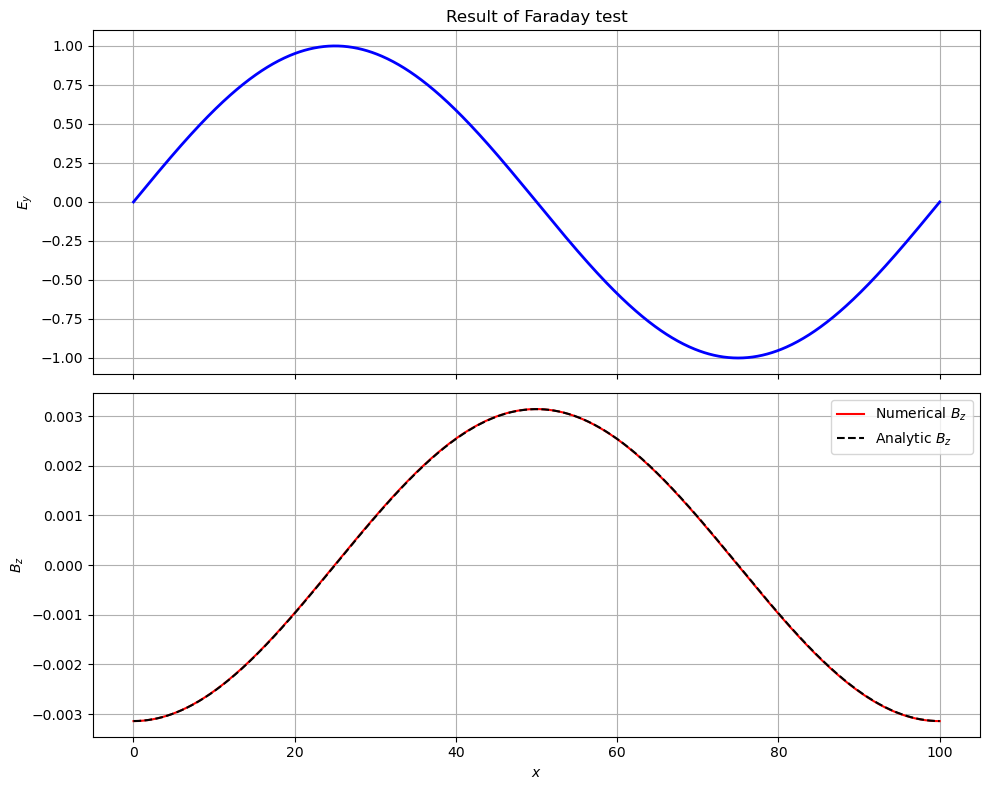

In [1]:
%matplotlib inline
from tests.ampere_faraday.evaluate_test import run_test as test_ampere_faraday
test_ampere_faraday()

Not sure why the last value is off here? I did run the boundary conditions on J, so I don't see why this could be happening.